**Importando e entendendo a base**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [11]:
base = pd.read_csv("melb_data.csv")
base.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",...,1.00,2.00,120.00,142.00,"2,014.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


**Tratando a base para usar no modelo**

In [12]:
#Retirar as colunas com uma alta cardinalidade
base = base.drop(["Suburb", "Address", "SellerG", "Date"], axis=1)

In [13]:
#Retirar colunas com mais de 20% de valores nulos
base = base.drop(["BuildingArea","YearBuilt"], axis=1)

In [14]:
#Visualizando a base restante
base.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,"1,480,000.00",S,2.50,"3,067.00",2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,2,h,"1,035,000.00",S,2.50,"3,067.00",2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,3,h,"1,465,000.00",SP,2.50,"3,067.00",3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,3,h,"850,000.00",PI,2.50,"3,067.00",3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,4,h,"1,600,000.00",VB,2.50,"3,067.00",3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


C:\Users\erika\AppData\Local\Temp\ipykernel_16348\3925957013.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(), annot=True, cmap="YlGnBu")


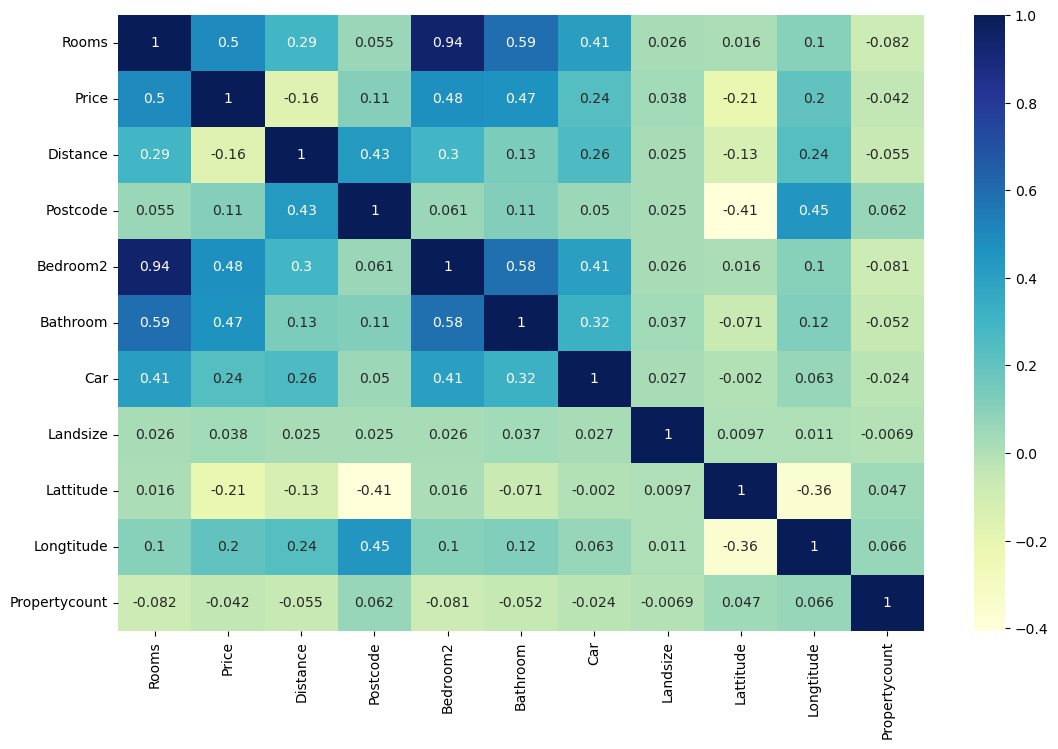

In [16]:
#Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [17]:
#Escolher o que tiver correlação mais alta e Landsize, pois retiramos o BuildingArea
base1 = base[["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Landsize"]]

**Verificando a base tratada**

In [18]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [19]:
#Tratando valores nulos: retirando esses valores da coluna Car
base1 = base1.dropna(axis=0)
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [20]:
base1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,"1,480,000.00",2,1.00,2.00,1.00,202.00
1,"1,035,000.00",2,1.00,2.00,0.00,156.00
2,"1,465,000.00",3,2.00,3.00,0.00,134.00
3,"850,000.00",3,2.00,3.00,1.00,94.00
4,"1,600,000.00",4,1.00,3.00,2.00,120.00


**Começando a criar nosso modelo de ML**

Separar entre a nossa variáveis que queremos prever (Y) e quais vão ser as colunas que vamos usar para essa previsão(X)

In [21]:
Y = base1.Price
X = base1.drop('Price', axis=1)

**Separar a nossa base em treino e teste**

In [22]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

**REGRESSÃO LINEAR**

In [23]:
#Importando o modelo
from sklearn.linear_model import LinearRegression

#Instanciando
modelo_regressao = LinearRegression()

#Realizando o fit do modelo
modelo_regressao.fit(x_treino,y_treino)

#Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

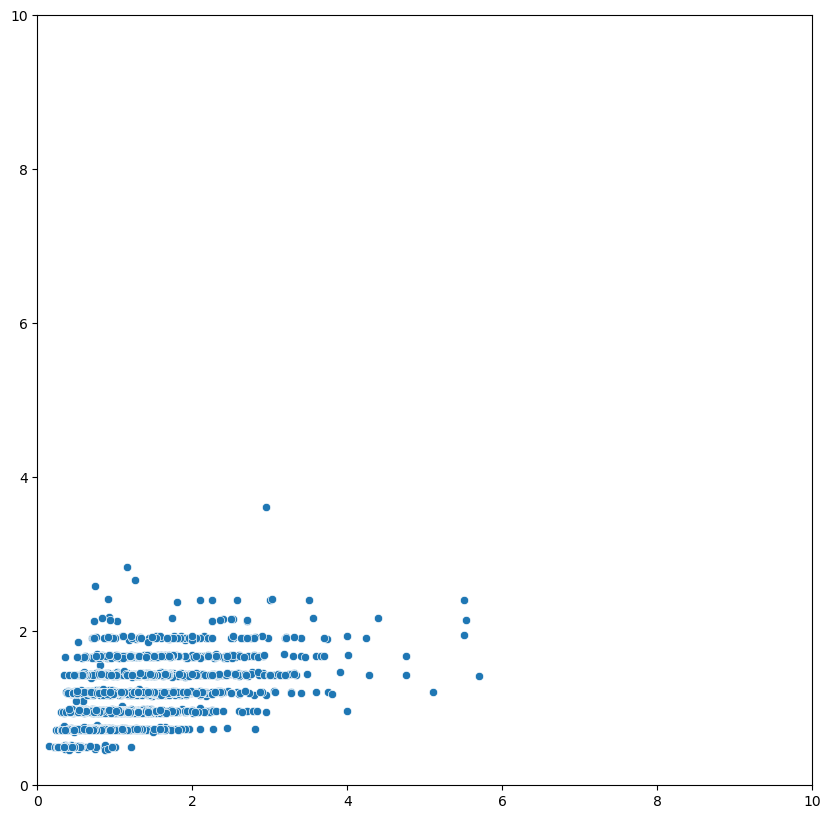

In [24]:
#Visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

Avaliar o modelo

In [25]:
#Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)

285303172750.5955


In [26]:
#Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)

0.2811811930414805


**Regressão Linear: Selecionando outras colunas**

In [27]:
base2 = base[["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Longtitude", "Lattitude", "Distance", "Landsize", "Postcode", "Propertycount"]]

In [28]:
#Verificando valores nulos e tratando
base2 = base2.dropna(axis=0)

base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Lattitude      13518 non-null  float64
 7   Distance       13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


**Fazer as mesmas etapas anteriores**

In [29]:
#Separando a base
Y = base2.Price
X = base2.drop('Price', axis=1)

#Dividindo em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

##Fazendo o fit para os novos dados
#Instanciando
modelo_regressao2 = LinearRegression()

#Realizando o fit do modelo
modelo_regressao2.fit(x_treino,y_treino)

#Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

##Avaliando os erros
#Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste,y_regressao2)
print(erro_quadratico_regressao2)

#Erro R quadrado
r2_regressao2 = r2_score(y_teste,y_regressao2)
print(r2_regressao2)


215581647956.14084
0.49642889894961395


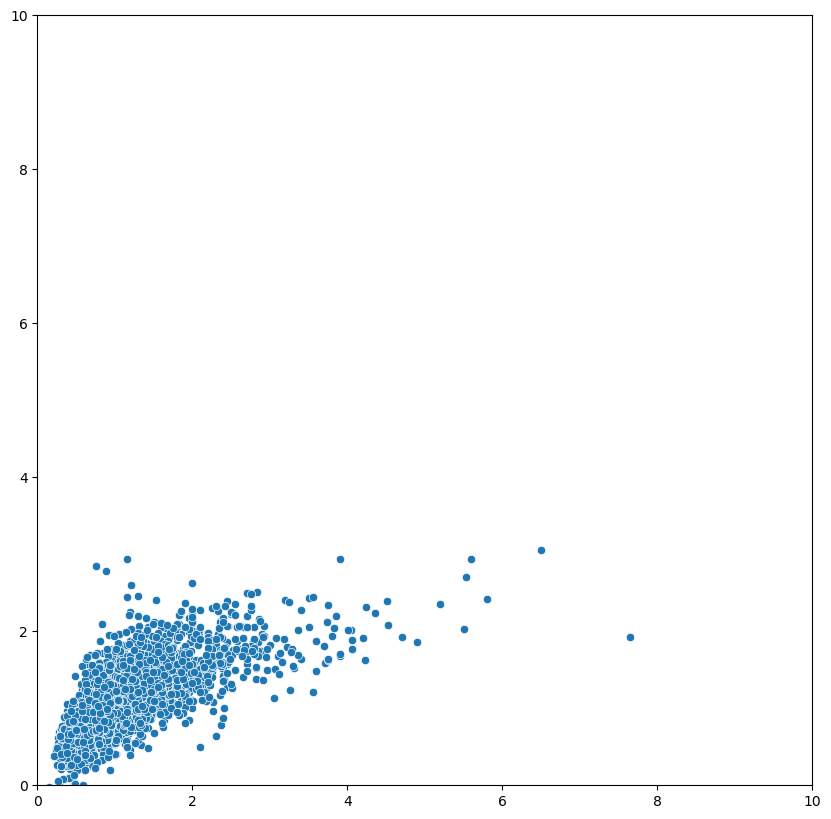

In [30]:
#Visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

**ÁRVORE DE DECISÃO**

In [31]:
#Importando o modelo
from sklearn.tree import DecisionTreeRegressor

#Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

#Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino,y_treino)

#Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [32]:
##Avaliando os erros
#Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

#Erro R quadrado
r2_arvore_decisao = r2_score(y_teste,y_arvore_decisao)
print(r2_arvore_decisao)

169342316495.94763
0.6044380512870171


**RESUMO DOS RESULTADOS**

In [33]:
print('REGRESSÃO LINEAR')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao,2)))
print('R quadrado: ' + str(round(r2_regressao,4)))
print('------------------------------------------')
print('REGRESSÃO LINEAR: novas features')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao2,2)))
print('R quadrado: ' + str(round(r2_regressao2,4)))
print('------------------------------------------')
print('ÁRVORE DE DECISÃO')
print('Erro quadrático médio: ' + str(round(erro_quadratico_arvore_decisao,2)))
print('R quadrado: ' + str(round(r2_arvore_decisao,4)))
print('------------------------------------------')

REGRESSÃO LINEAR
Erro quadrático médio: 285303172750.6
R quadrado: 0.2812
------------------------------------------
REGRESSÃO LINEAR: novas features
Erro quadrático médio: 215581647956.14
R quadrado: 0.4964
------------------------------------------
ÁRVORE DE DECISÃO
Erro quadrático médio: 169342316495.95
R quadrado: 0.6044
------------------------------------------
